## Confusion matrix & metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [2]:
model = LogisticRegression().fit(X,y)
y_pred = model.predict(X)
y_score = model.decision_function(X)  # decision_function(): 판별함수 값 계산
# f_value(계산된 판별함수 값)가 양수이면 y=1, 음수이면 y=0으로 분류

# 데이터프레임 형태로 확인해 보자
df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,
                  columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)
display(df.head(), df.tail())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_score,y_pred,y
0,4.989672,1.0,1.0
1,4.393606,1.0,1.0
2,4.246063,1.0,1.0
3,3.693593,1.0,1.0
4,3.363411,1.0,0.0


,y_score,y_pred,y
95,-3.730259,0.0,0.0
96,-4.185177,0.0,0.0
97,-4.541954,0.0,0.0
98,-5.151099,0.0,0.0
99,-5.342912,0.0,0.0


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# 지표 확인
print(confusion_matrix(y, y_pred)) # TP FN FP TN
display(accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred))
print(classification_report(y, y_pred))

[[41 10]
 [ 5 44]]


0.85

0.8148148148148148

0.8979591836734694

0.8543689320388349

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        51
           1       0.81      0.90      0.85        49

   micro avg       0.85      0.85      0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [4]:
# threshold를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

print(confusion_matrix(y, lower_threshold))
print(classification_report(y, lower_threshold))

,y_score,y_hat,y
68,-1.644725,1.0,0.0
69,-1.663578,1.0,0.0
70,-1.693782,1.0,0.0
71,-1.787711,1.0,0.0
72,-1.826013,1.0,0.0
73,-1.862628,1.0,0.0
74,-1.898972,1.0,0.0
75,-1.935761,1.0,0.0
76,-1.959980,1.0,0.0
77,-2.024849,0.0,0.0


[[23 28]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        51
           1       0.64      1.00      0.78        49

   micro avg       0.72      0.72      0.72       100
   macro avg       0.82      0.73      0.70       100
weighted avg       0.82      0.72      0.70       100



## ROC, PR 곡선 그리기

In [5]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# model = LogisticRegression()

y_score = model.fit(X_train, y_train).decision_function(X_test)

# decision_function()을 사용할 수 없는 모델의 경우 y_score 대신 predict_proba()로 확률값을 구해줌
# probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
# probs = probs[:, 1] # 0,1 중 1로 분류될 확률

# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 640x480 with 1 Axes>

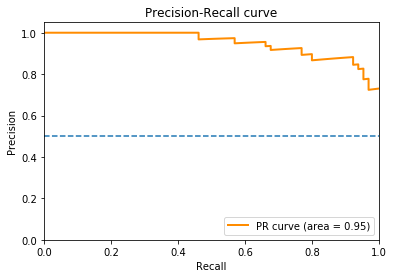

In [6]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# calculate precision-recall AUC
pr_auc = auc(recall, precision)

plt.plot(recall, precision, lw=2, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

## Cross Validation

In [7]:
# kFold 모듈
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[ 1.21724114e+00  1.18553073e+00]
 [ 2.73205990e-01 -2.96611507e-01]
 [-1.17835484e-01  5.68773365e-01]
 [-4.73600076e-01  1.27352899e+00]
 [-2.84422806e+00  8.99013366e-01]
 [ 1.41680502e+00 -9.48024752e-01]
 [ 1.05150816e+00  4.51526065e-01]
 [-2.49895377e-01 -4.30675570e-01]
 [ 1.85208752e+00  1.98537951e+00]
 [ 1.71128152e+00  1.90850645e+00]
 [-1.52465950e+00  1.06614926e+00]
 [-3.59826052e-01  9.57858133e-01]
 [ 1.15905582e+00 -1.07813195e+00]
 [-1.45499587e+00  8.21110294e-01]
 [-1.35958041e-01 -3.49968693e-01]
 [ 8.70523503e-01  7.67685555e-01]
 [ 7.34490141e-01  6.57038836e-01]
 [-1.65701454e+00  1.14774021e+00]
 [-6.43251060e-01  8.70255708e-01]
 [ 8.16642574e-01 -5.48987237e-01]
 [-1.79550730e+00  5.87267576e-01]
 [ 7.38919479e-01 -1.70229865e+00]
 [ 1.14710350e+00 -1.96822347e+00]
 [ 9.35855469e-01  9.61985359e-01]
 [ 1.10073689e+00  3.45054648e-01]
 [ 1.52811419e+00  1.55761577e+00]
 [-2.25498660e+00 -2.16905606e+00]
 [-9.65593349e-01 -1.08647686e+00]
 [-1.73799145e+00 -1

In [8]:
# cross_val_score 모듈
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)
# cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.85, 0.92, 0.8 , 0.87, 0.86])

In [9]:
scores = cross_val_score(LogisticRegression(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.88095238, 0.78313253, 0.90361446])

In [10]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.93, 0.8 , 0.78, 0.88, 0.9 ])

In [11]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.858

0.0033759999999999997

## Grid Search

In [13]:
# 딕셔너리 형태로 시험할 파라미터를 지정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
# 로지스틱 회귀의 경우 주요 파라미터: C, penalty 등
# 이 경우 파라미터'C'값 6개, 'penalty'값 2개의 조합 => 총 6x2=12번 모델 돌리게 됨

In [14]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # 보통 교차검증을 사용한 그리드 서치를 시행!
# GridSearchCV(모델, 파라미터 딕셔너리)
grid_search.fit(X, y)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

최적의 파라미터:  {'C': 1, 'penalty': 'l1'}
최고 성능 모델:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
최고 교차검증 점수: 0.86


In [39]:
# 데이터프레임으로 교차검증 결과 확인해보자 (grid_search.cv_results_)
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행 출력
display(np.transpose(results.head()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,0,1,2,3,4
mean_fit_time,0.00158787,0.00228257,0.00205574,0.00188508,0.00192738
std_fit_time,0.00057915,0.000507351,0.000223673,0.000198442,0.000470564
mean_score_time,0.000712252,0.000694942,0.000629807,0.000688791,0.000637484
std_score_time,0.000266401,0.000242016,0.000193803,0.000382067,0.000204024
param_C,0.001,0.001,0.01,0.01,0.1
param_penalty,l1,l2,l1,l2,l1
params,"{'C': 0.001, 'penalty': 'l1'}","{'C': 0.001, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}"
split0_test_score,0.502488,0.930348,0.935323,0.935323,0.935323
split1_test_score,0.502488,0.935323,0.935323,0.935323,0.930348
split2_test_score,0.5,0.955,0.955,0.955,0.95


# Quest

In [15]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [22]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
df = pd.DataFrame(X, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
# sklearn에서 train_test_split 함수 불러오기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], data.target, 
                                                    test_size=0.25, stratify=data.target, random_state=123456)

# train_test_split(x, y, test_size, stratify, random_state)
# test_size : 테스트 데이터 사이즈
# train_size : 트레인 데이터 사이즈
# stratify : 클래스 라벨
# random_state : 난수 시드

In [43]:
df2 = pd.DataFrame(np.vstack([X_train['mean radius'],X_train['mean texture'],y_train]).T,columns = ['mean radius', 'mean texture', 'y'])
df2.head()

,mean radius,mean texture,y
0,13.77,22.29,0.0
1,14.06,17.18,1.0
2,19.27,26.47,0.0
3,23.21,26.97,0.0
4,10.18,17.53,1.0


In [56]:
X_trmean = np.array(df2.iloc[:,0:2])
X_trmean[0:5]

array([[13.77, 22.29],
       [14.06, 17.18],
       [19.27, 26.47],
       [23.21, 26.97],
       [10.18, 17.53]])

In [57]:
y_tr = np.array(df2.iloc[:,-1])
y_tr[0:5]

array([0., 1., 0., 0., 1.])

In [58]:
df3 = pd.DataFrame(np.vstack([X_test['mean radius'],X_test['mean texture'],y_test]).T,columns = ['mean radius', 'mean texture', 'y'])
df3.head()

,mean radius,mean texture,y
0,14.40,26.99,1.0
1,14.97,16.95,1.0
2,14.25,22.15,0.0
3,14.34,13.47,1.0
4,15.27,12.91,1.0


In [59]:
X_temean = np.array(df3.iloc[:,0:2])
X_temean[0:5]

array([[14.4 , 26.99],
       [14.97, 16.95],
       [14.25, 22.15],
       [14.34, 13.47],
       [15.27, 12.91]])

In [60]:
y_te = np.array(df3.iloc[:,-1])
y_te[0:5]

array([1., 1., 0., 1., 1.])

In [63]:
model = LogisticRegression().fit(X_trmean,y_tr)
y_pred = model.predict(X_temean)
y_score = model.decision_function(X_temean)  # decision_function(): 판별함수 값 계산
# f_value(계산된 판별함수 값)가 양수이면 y=1, 음수이면 y=0으로 분류

# 데이터프레임 형태로 확인해 보자
df4 = pd.DataFrame(np.vstack([y_score, y_pred, y_te]).T,
                  columns=["y_score", "y_pred", "y_te"])
df4 = df4.sort_values("y_score", ascending=False).reset_index(drop=True)
display(df4.head(), df4.tail())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_score,y_pred,y_te
0,3.150826,1.0,1.0
1,3.046256,1.0,1.0
2,3.013876,1.0,1.0
3,2.888966,1.0,1.0
4,2.744565,1.0,1.0


,y_score,y_pred,y_te
138,-4.874310,0.0,0.0
139,-4.952579,0.0,0.0
140,-5.750678,0.0,0.0
141,-6.019407,0.0,0.0
142,-6.029073,0.0,0.0


In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# 지표 확인
print(confusion_matrix(y_te, y_pred)) # TP FN FP TN
display(accuracy_score(y_te, y_pred), precision_score(y_te, y_pred), recall_score(y_te, y_pred), f1_score(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[46  7]
 [ 5 85]]


0.916083916083916

0.9239130434782609

0.9444444444444444

0.934065934065934

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        53
         1.0       0.92      0.94      0.93        90

   micro avg       0.92      0.92      0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



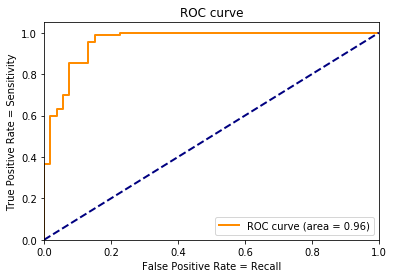

In [65]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# decision_function()을 사용할 수 없는 모델의 경우 y_score 대신 predict_proba()로 확률값을 구해줌
# probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
# probs = probs[:, 1] # 0,1 중 1로 분류될 확률

# calculate AUC
roc_auc = roc_auc_score(y_te, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_te, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
# sklearn에서 RandomForestClassifier 함수 불러오기
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# n_estimators : 생성할 트리의 개수
# oob_score : out-of-bag score, 예측이 얼마나 정확한가에 대한 추정을 수치로 나타낸 것

rf.fit(X_trmean, y_tr)
# rf.fit(features, targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [72]:
rf_y_pred = rf.predict(X_temean)
rf_y_score = rf.predict_proba(X_temean) 
rf_y_score = rf_y_score[:,1]

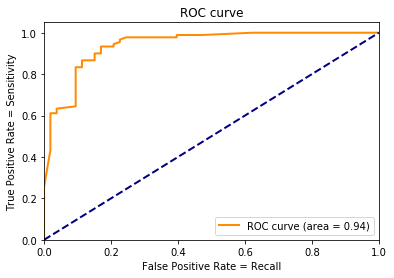

In [73]:
# calculate AUC
roc_auc = roc_auc_score(y_te, rf_y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_te, rf_y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_trmean,y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

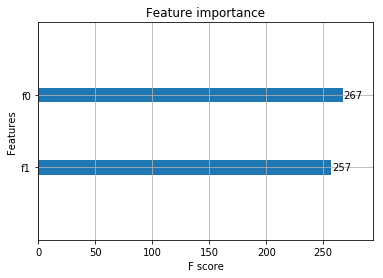

In [75]:
from xgboost import plot_importance
plot_importance(xgmodel)

In [76]:
xg_y_pred = xgmodel.predict(X_temean)
xg_y_score = xgmodel.predict_proba(X_temean) 
xg_y_score = xg_y_score[:,1]


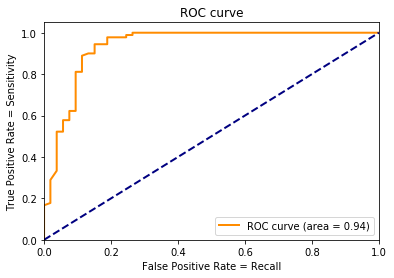

In [77]:
# calculate AUC
roc_auc = roc_auc_score(y_te, xg_y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_te, xg_y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

로지스틱:0.96>xgboost:0.94 = 랜덤포레스트:0.92

In [78]:
# 딕셔너리 형태로 시험할 파라미터를 지정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
# 로지스틱 회귀의 경우 주요 파라미터: C, penalty 등
# 이 경우 파라미터'C'값 6개, 'penalty'값 2개의 조합 => 총 6x2=12번 모델 돌리게 됨

In [80]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # 보통 교차검증을 사용한 그리드 서치를 시행!
# GridSearchCV(모델, 파라미터 딕셔너리)
grid_search.fit(X_trmean, y_tr)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

최적의 파라미터:  {'C': 10, 'penalty': 'l2'}
최고 성능 모델:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
최고 교차검증 점수: 0.89


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

In [84]:
fianl_model =LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False).fit(X_trmean,y_tr)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
final_y_pred = fianl_model.predict(X_temean)
final_y_score = fianl_model.decision_function(X_temean)

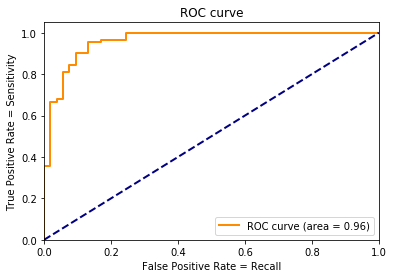

In [86]:
# calculate AUC
roc_auc = roc_auc_score(y_te, final_y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_te, final_y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

교차 점수 0.86 -> 0.89 로 향상